# On modèlise avec toute les données

## Exploration des données (Importation, exportation, visualisation

In [75]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris=datasets.load_iris()


In [76]:
#On stock nos colonne hors target dans les datas
data= iris.data
data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [77]:
#On stock notre colonne target dans la variable target
target= iris.target
target[0:5]

array([0, 0, 0, 0, 0])

In [78]:
#verification de l'équilibre de la dataset
for i in [0,1,2]:
    print("classe: %s, nb exemplaires: %s" % (i, len(target[ target == i])))

classe: 0, nb exemplaires: 50
classe: 1, nb exemplaires: 50
classe: 2, nb exemplaires: 50


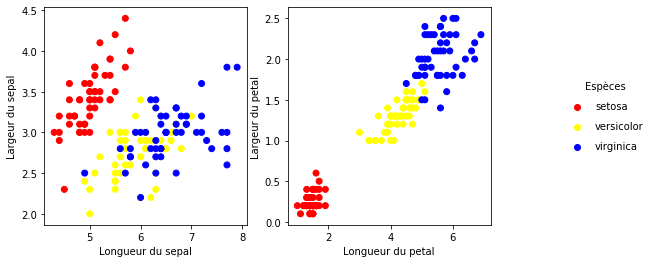

In [79]:
fig = plt.figure(figsize=(8, 4))
#On positionne deux graphique mettant en corélation les variable corélé (Petal et Sepal)
plot1=plt.subplot(1,2,1)

clist= ['red', 'yellow', 'blue'] #Les couleurs 
colors = [clist[c] for c in iris.target]
plot1.scatter(data[:,0], data[:, 1], c=colors)
plt.xlabel ('Longueur du sepal')
plt.ylabel ('Largeur du sepal')

plot2= plt.subplot(1,2,2)#L'ordre import si je le déclare en même temps que plot1 je perd des donnée (Légendes)

plot2.scatter(data[:,2], data[:,3], color=colors)
plt.xlabel ('Longueur du petal')
plt.ylabel ('Largeur du petal')

for ind, s in enumerate(iris.target_names):
    
    plt.scatter([],[], label=s, color=clist[ind])
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, bbox_to_anchor=(1.8, .5), loc="center right", title="Espèces")
#On paramètre notre légendes pour avoir un visuel qui nous convient
plt.plot();

#Je note une plus forte corélation avec les pétals qu'avec les sépal (Je la note pour plus tard)

In [80]:
#Je pourais faire un pairplot pour explorer d'autre possibiliter mais je n'ai pas créer de dataframe
#Et je ne sais pas si la fonction sns.pairplot permet d'utiliser les data tel que je les ais 

## Modélisation 

### Split des données

In [105]:
#Je split donc mes données grâce à train_test_split
from sklearn.model_selection import train_test_split

test_data = train_test_split(data, target
                                 , random_state=0
                                 , train_size=0.5)
#Je choisi une répartition 80 / 20 dans un premier temps mais celà me provoque un phénomène de 
#surapprentissage

data_train, data_test, target_train, target_test = test_data

#J'ai visualier mes données pour m'assurer que tout est ok 
#Je remarque que j'ai encore de léger souci de compréhension à travailler
print(data_train[:5])
print(data_test[:5])
print(target_test[:5])


[[4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]]
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
[2 1 0 2 0]


### Modélisation

In [96]:
from sklearn.linear_model import LogisticRegression
#On importe notre nouveau model LogisticRegression

lr= LogisticRegression()


In [97]:
#On entraine le model
lr.fit(data_train, target_train)
lr.get_params


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [98]:
result=lr.predict(data_test)
print(result)
print(target_test)

#On fait notre test et on obtiens un résultat

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


## Evaluation du modèle

In [99]:
#On importe la fonction accuracy et confusion matrix pour visualiser nos données. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [100]:
#On calcul la précision(Accuracy ) avec un score en %
accuracy_score(result, target_test)
#100 % avec 80 / 20 j'ai testé 50 / 50 pour tester j'obtiens 0.93

0.9333333333333333

In [101]:
#On génére la matrice de confusion pour vérifié le modèle 
conf= confusion_matrix(target_test, result)
conf
#Effectivement il n'y a pas de doute le modèle est tombé juste à chaque fois.

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  4, 20]], dtype=int64)

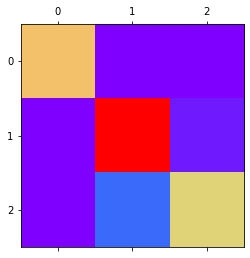

In [102]:
plt.matshow(conf, cmap='rainbow');

# Partie 2: On utilise que deux colonnes.

In [103]:
#On isole nos données de pétales dans une variable
#J'ai remarqué la corélation plus forte des pétales par rapport au sépal du coup 
#Je vais tenter de modèliser avec ces deux données.
data2=iris.data[:, 2:]
target2=iris.target
data2[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [106]:
#On split
test_data2 = train_test_split(data2, target2
                                 , random_state=0
                                 , train_size=0.5)

data_train2, data_test2, target_train2, target_test2 = test_data2


In [107]:
#On train
lr.fit(data_train2, target_train2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
#On prédit
pred=lr.predict(data_test2)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]


In [111]:
#On évalue
accuracy_score(pred, target_test2)

0.96

[[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]


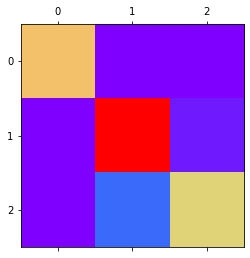

In [110]:
#On visualise une nouvelle fois

conf2= confusion_matrix(target_test, result)
print(conf2)
plt.matshow(conf, cmap='rainbow');

#On remarque une augmentation de la précision par rapport au précédent model. 
#Les sepals causent une confusion du modèle et ne semble pas aider la prédiction

